# Predicting Traffic Signs using Neural Networks

Deep learning is a field from machine learning that uses algorithms inspired by how neurons function in the human brain. TensorFlow is a machine learning framework that Google created to design, build, and train deep learning models. The name, "TensorFlow", is derived from how neural networks perform on multidimensional data arrays or tensors. It's a flow or tensors, just like how the human brain has a flow of neurons! Our tool that we will be using today is TensorFlow!

## Basics of TensorFlow

We first import tensorflow then utilize two tensors to multiply and produce a result. But what's going on? The result is just a tensor without what we were expecting. This means that TensorFlow has a lazy evaluation!

In [1]:
# Import `tensorflow`
import tensorflow as tf

# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


In order to get the tensor that we were looking for, we need to create a session and print the results. (Make sure to close the session when finished!)

In [2]:
# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 32]


Here is a cleaner way to approach it.

In [3]:
# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


## Belgian Traffic Signs

Here we take traffic signs from Belgium to train and test our neural network.

Data source: http://btsd.ethz.ch/shareddata/

In [4]:
import os
import skimage.data

def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/eric/"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

images, labels = load_data(train_data_directory)

print('There are', len(images), 'images in the training set.')
print('There are', len(set(labels)), 'labels in the training set.')

There are 4575 images in the training set.
There are 62 labels in the training set.


Here we look at the distribution of Traffic Sign Labels

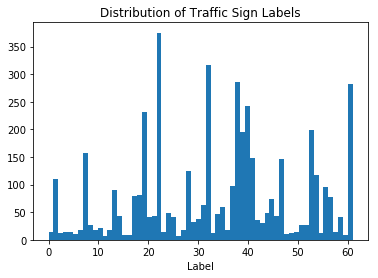

In [5]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.title('Distribution of Traffic Sign Labels')
plt.xlabel('Label')
plt.show()

## Visualizing Traffic Signs

Notice how each image is in a different sign. The images are also very unique, so it makes sense that we have 62 labels to work with!

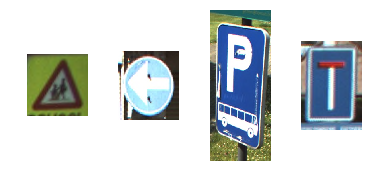

In [6]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

### Taking a look at the sizes of some images.

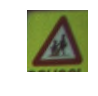

shape: (62, 61, 3), min: 3, max: 160


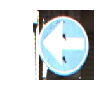

shape: (110, 96, 3), min: 3, max: 255


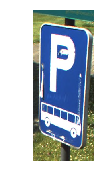

shape: (379, 153, 3), min: 0, max: 255


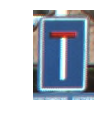

shape: (100, 68, 3), min: 17, max: 255


In [7]:
# Determine the (random) indexes of the images
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

### Here are all of the 62 unique signs that this dataset contains.

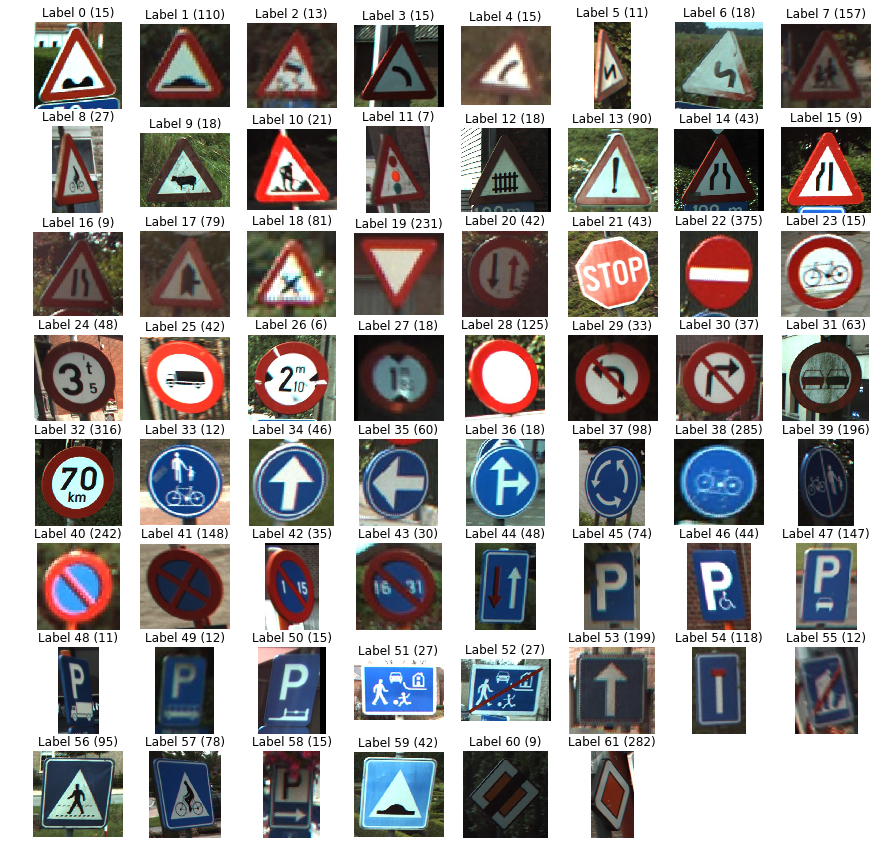

In [8]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

## Feature Extraction

To help out our neural network, we need to clean up some features that may be confusing. What could be troublesome about these images? You guessed it, the dimensions! Let's transfrom these images to a consistent size.

In [9]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

C:\Users\eric\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Another thing that we can do is convert to grayscale.

In [10]:
import numpy as np # We acutally got this far without using numpy..

# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

### Before Feature Extraction

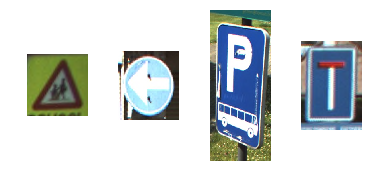

In [11]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

### After Feature Extraction

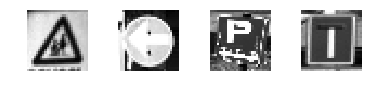

In [12]:
traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

## Deep Learning with TensorFlow

Now that we are done with feature extraction, we can start constructing our neural network! Let's flatten the input data, connect each layer, define a loss function, define optimization, convert logits into label indexes, and define an accuracy metric.

In [13]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#### Checking our tensors to see if everything went through.

In [14]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 62), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


## Running our Neural Network

In [15]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')

EPOCH 0
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 1
DONE WITH EPOCH
EPOCH 2
DONE WITH EPOCH
EPOCH 3
DONE WITH EPOCH
EPOCH 4
DONE WITH EPOCH
EPOCH 5
DONE WITH EPOCH
EPOCH 6
DONE WITH EPOCH
EPOCH 7
DONE WITH EPOCH
EPOCH 8
DONE WITH EPOCH
EPOCH 9
DONE WITH EPOCH
EPOCH 10
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 11
DONE WITH EPOCH
EPOCH 12
DONE WITH EPOCH
EPOCH 13
DONE WITH EPOCH
EPOCH 14
DONE WITH EPOCH
EPOCH 15
DONE WITH EPOCH
EPOCH 16
DONE WITH EPOCH
EPOCH 17
DONE WITH EPOCH
EPOCH 18
DONE WITH EPOCH
EPOCH 19
DONE WITH EPOCH
EPOCH 20
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 21
DONE WITH EPOCH
EPOCH 22
DONE WITH EPOCH
EPOCH 23
DONE WITH EPOCH
EPOCH 24
DONE WITH EPOCH
EPOCH 25
DONE WITH EPOCH
EPOCH 26
DONE WITH EPOCH
EPOCH 27
DONE WITH EPOCH
EPOCH 28
DONE WITH EPOCH
EPOCH 29
DONE WITH EPOCH
EPOCH 30
Loss:  Tensor("Mean:0", shape=(), dtype=float32)
DONE WITH EPOCH
EPOCH 31
DONE WITH EPOCH
EPOCH 32
DONE 

## Evaluating our Neural Network

[40, 13, 28, 14, 22, 47, 61, 32, 19, 40]
[40 13 28  7 22 47 61 32 19 40]


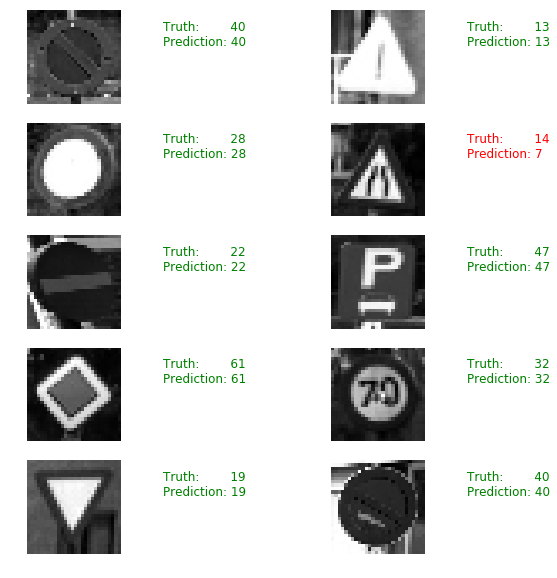

In [16]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images = [images28[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [17]:
# Import `skimage`
from skimage import transform

# Load the test data
test_images, test_labels = load_data(test_data_directory)

# Transform the images to 28 by 28 pixels
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images28 = rgb2gray(np.array(test_images28))

# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

C:\Users\eric\AppData\Local\Continuum\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Accuracy: 0.683


### Conclusion

Our Neural Network got an accuracy score of 68.3%. Considering that this project didn't fully utilize a GPU or an extensive neural network, I would say that this is pretty good. 

Some improvements that could be made could be applying LDA before feeding to our model, early or late stopping of training, and tuning our optimizers. With extensive improvements to this starter, we could re-use this and apply it to self-driving cars or other autonomous vehicles in the future!